In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import os,sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


sns.set()

In [2]:
df=pd.read_csv(r"C:\liver disease\Liver Patient Dataset (LPD)_train.csv",encoding="latin1")

In [3]:
df.head(10)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [4]:
df.shape

(30691, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [6]:
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [7]:
df.columns=df.columns.str.strip()
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [12]:
df=df.rename(columns={'Age of the patient':"Age",
                      'Gender of the patient': 'Gender',
                      'Total Bilirubin':'Tot_Bil',
                      'Direct Bilirubin':'Dir_Bil',
                      'Alkphos Alkaline Phosphotase': 'Alk_Phos', 
                      'Sgpt Alamine Aminotransferase': 'ALT',
                      'Sgot Aspartate Aminotransferase': 'AST',
                      'Total Protiens' :'Tot_pro',
                      'ALB Albumin': 'Alb',
                      'A/G Ratio Albumin and Globulin Ratio': 'A_G_Ratio',
                        })
df.columns

Index(['Age', 'Gender', 'Tot_Bil', 'Dir_Bil', 'Alk_Phos', 'ALT', 'AST',
       'Tot_pro', 'Alb', 'A_G_Ratio', 'Result'],
      dtype='object')

In [14]:
numerical_col=["Age of the patient",'Total Bilirubin','Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin','A/G Ratio Albumin and Globulin Ratio']

In [15]:
df['ASTALT_Ratio'] = df['AST'] / df['ALT']
df['Bil_Ratio'] = df['Dir_Bil'] / df['Tot_Bil']
df['Alb_Glob_Ratio'] = df['Alb'] / (df['Tot_pro'] - df['Alb'])

numerical_col+= ['Bilirubin_Ratio', 'Alb_Glob_Ratio','ASTALT_Ratio']
df.head(10)

,Age,Gender,Tot_Bil,Dir_Bil,Alk_Phos,ALT,AST,Tot_pro,Alb,A_G_Ratio,Result,ASTALT_Ratio,Bil_Ratio,Alb_Glob_Ratio
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,1.125000,0.142857,0.942857
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1.562500,0.504587,0.744186
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1.133333,0.561644,0.891892
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1.428571,0.400000,1.000000
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,2.185185,0.512821,0.489796
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1,0.736842,0.388889,1.375000
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1,0.785714,0.333333,1.161290
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2,0.863636,0.333333,1.242424
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1,1.094340,0.285714,1.000000
10,57.0,Male,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,1,1.156863,0.166667,0.843750


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27158 entries, 0 to 30690
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             27158 non-null  float64
 1   Gender          27158 non-null  object 
 2   Tot_Bil         27158 non-null  float64
 3   Dir_Bil         27158 non-null  float64
 4   Alk_Phos        27158 non-null  float64
 5   ALT             27158 non-null  float64
 6   AST             27158 non-null  float64
 7   Tot_pro         27158 non-null  float64
 8   Alb             27158 non-null  float64
 9   A_G_Ratio       27158 non-null  float64
 10  Result          27158 non-null  int64  
 11  ASTALT_Ratio    27158 non-null  float64
 12  Bil_Ratio       27158 non-null  float64
 13  Alb_Glob_Ratio  27158 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 3.1+ MB


In [17]:
print("Min value of ASTALT Ratio", df["ASTALT_Ratio"].min())
print("Max value of ASTALT Ratio", df["ASTALT_Ratio"].max())
print("Min value of ASTALT Ratio", df["Bil_Ratio"].min())
print("Max value of ASTALT Ratio", df["Bil_Ratio"].max())
print("Min value of ASTALT Ratio", df["Alb_Glob_Ratio"].min())
print("Max value of ASTALT Ratio", df["Alb_Glob_Ratio"].max())

Min value of ASTALT Ratio 0.08994708994708994
Max value of ASTALT Ratio 66.16666666666667
Min value of ASTALT Ratio 0.048
Max value of ASTALT Ratio 5.0
Min value of ASTALT Ratio 0.2777777777777778
Max value of ASTALT Ratio 3.0000000000000004


In [18]:
df.to_csv(r"D:\fatttyliverdataset\fattyliver.csv", index=False)

In [19]:
def classify_fatty_liver(row):
    if (
        row["ALT"] > 40 and row["ASTALT_Ratio"] < 1 and 
        row["Bil_Ratio"] < 1.2 and row["Alb_Glob_Ratio"] > 1
    ):
        return 1  

    if row["ASTALT_Ratio"] > 1.5:
        return 0 

    if row["Alb"] < 3.5 and row["A_G_Ratio"] < 1.1:
        return 0 

    if row["Tot_Bil"] > 1.2 or row["Dir_Bil"] > 0.3 or row["Alk_Phos"] > 147:
        return 0  

    if row["Gender"] == "Male" and row["Age"] > 40:
        if row["ALT"] > 30 or row["A_G_Ratio"] > 1.1:
            return 1  

    if row["Gender"] == "Female" and row["Age"] > 50:
        if row["ALT"] > 25 and row["Alb_Glob_Ratio"] > 1.2:
            return 1  

    if row["Tot_pro"] > 6.5 and row["Alb_Glob_Ratio"] > 1.1:
        return 1 

    return 0  

df["Result"] = df.apply(classify_fatty_liver, axis=1)


In [20]:
df.head(30)

,Age,Gender,Tot_Bil,Dir_Bil,Alk_Phos,ALT,AST,Tot_pro,Alb,A_G_Ratio,Result,ASTALT_Ratio,Bil_Ratio,Alb_Glob_Ratio
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0,1.125000,0.142857,0.942857
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0,1.562500,0.504587,0.744186
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0,1.133333,0.561644,0.891892
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0,1.428571,0.400000,1.000000
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0,2.185185,0.512821,0.489796
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,0,0.736842,0.388889,1.375000
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,0,0.785714,0.333333,1.161290
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,0,0.863636,0.333333,1.242424
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,0,1.094340,0.285714,1.000000
10,57.0,Male,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,0,1.156863,0.166667,0.843750


In [21]:
df["Result"].value_counts()

Result
0    24741
1     2417
Name: count, dtype: int64


Original Boxplots:


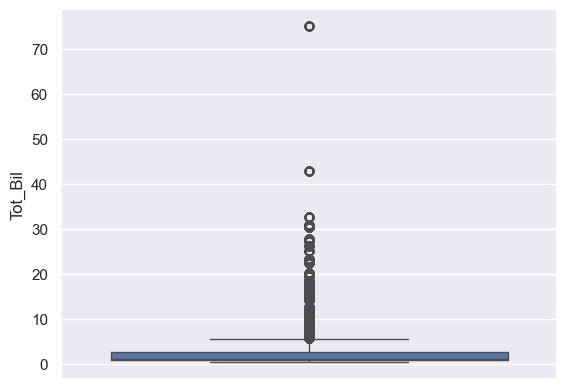

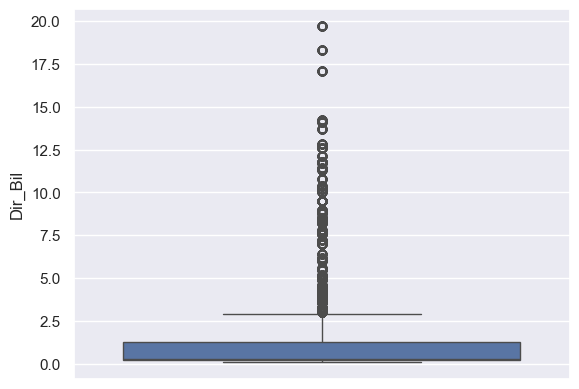

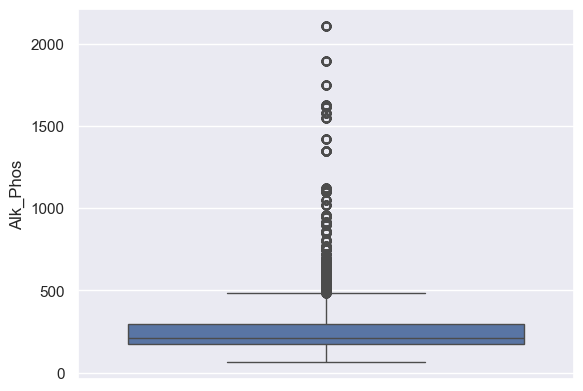

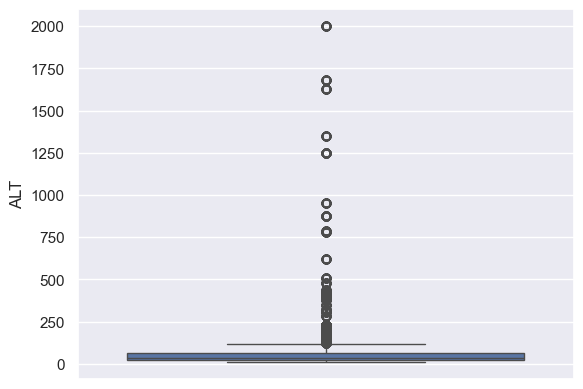

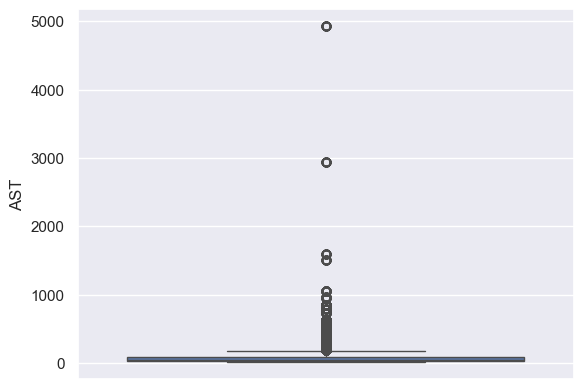

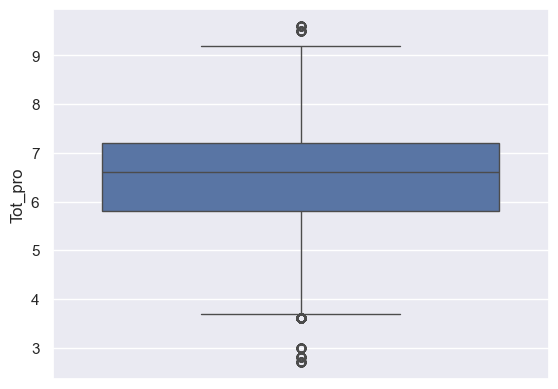

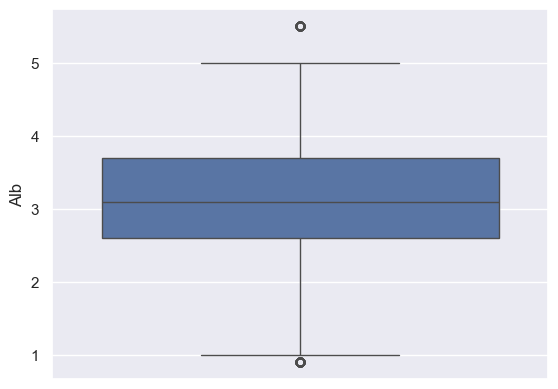

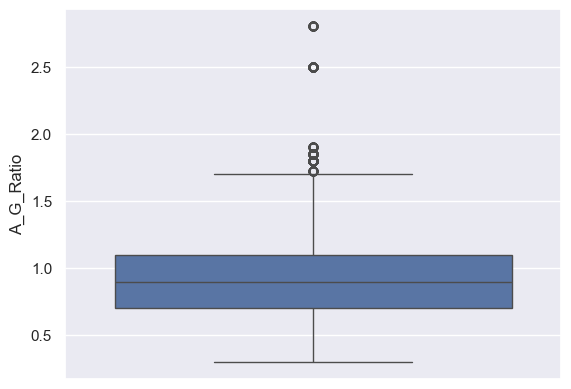

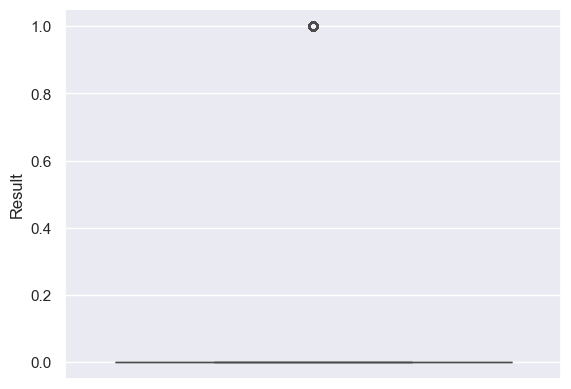

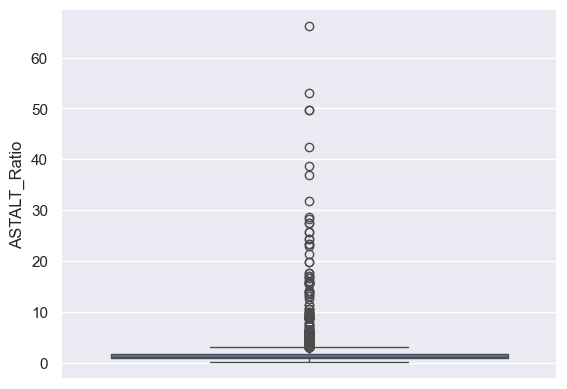

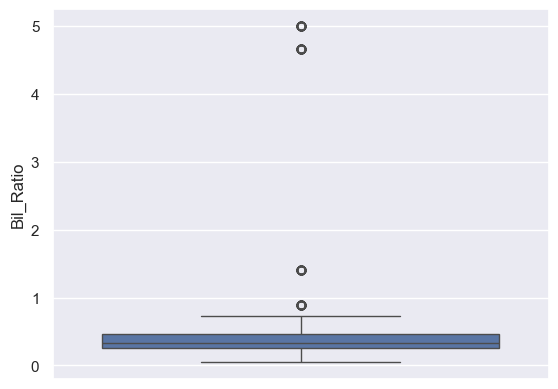

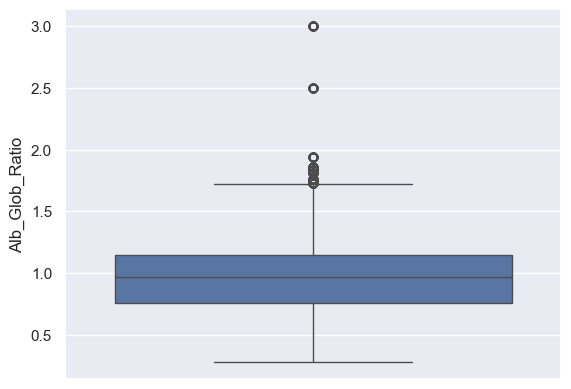

In [22]:
print("\nOriginal Boxplots:")
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list (df.select_dtypes(exclude=["object"]).columns)[1:]: 
    boxplots(i)

In [23]:
numeric_df =df.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

In [24]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
lower_bound

Age                0.000000
Tot_Bil           -2.050000
Dir_Bil           -1.450000
Alk_Phos          -9.500000
ALT              -35.500000
AST              -67.000000
Tot_pro            3.700000
Alb                0.950000
A_G_Ratio          0.100000
Result             0.000000
ASTALT_Ratio      -0.525000
Bil_Ratio         -0.072183
Alb_Glob_Ratio     0.179654
dtype: float64

In [26]:
upper_bound

Age                88.000000
Tot_Bil             5.550000
Dir_Bil             2.950000
Alk_Phos          482.500000
ALT               120.500000
AST               181.000000
Tot_pro             9.300000
Alb                 5.350000
A_G_Ratio           1.700000
Result              0.000000
ASTALT_Ratio        3.115000
Bil_Ratio           0.786972
Alb_Glob_Ratio      1.720779
dtype: float64

In [27]:
for col in df.columns.difference(["Result","Gender"]):
    df[col]=df[col].clip(lower=lower_bound[col],upper=upper_bound[col])

\Boxplots After Outlier Treatment:


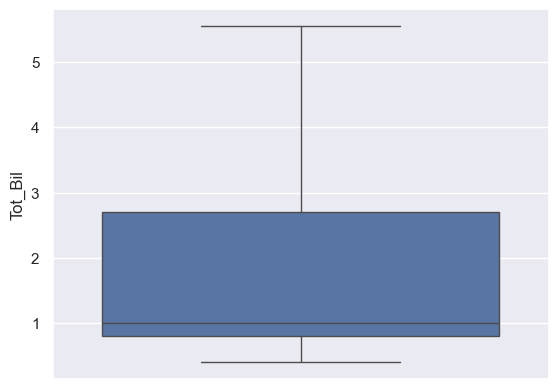

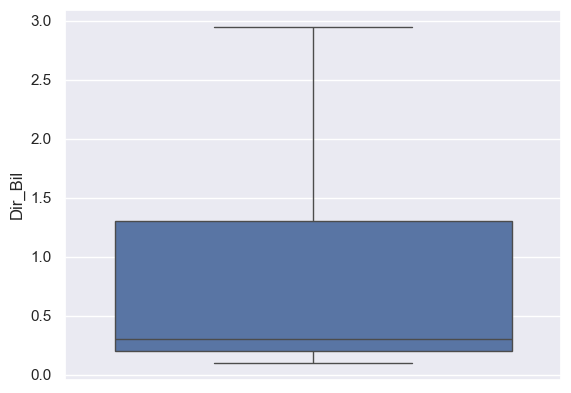

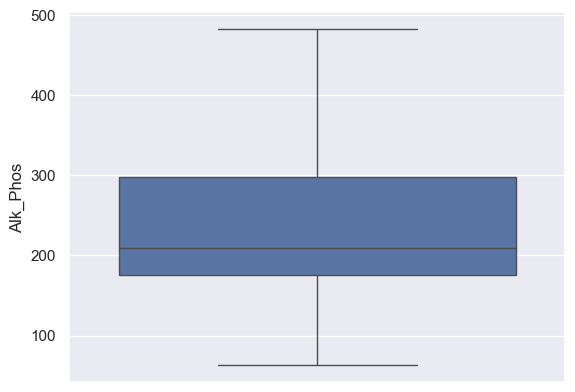

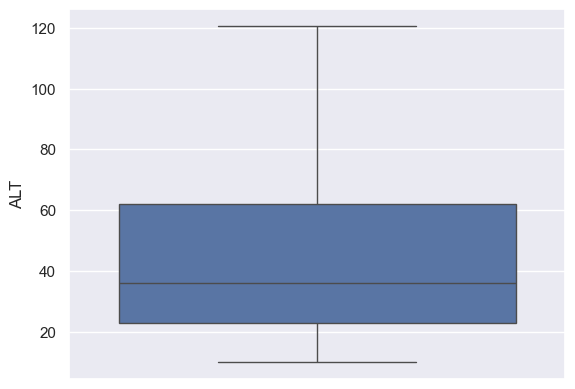

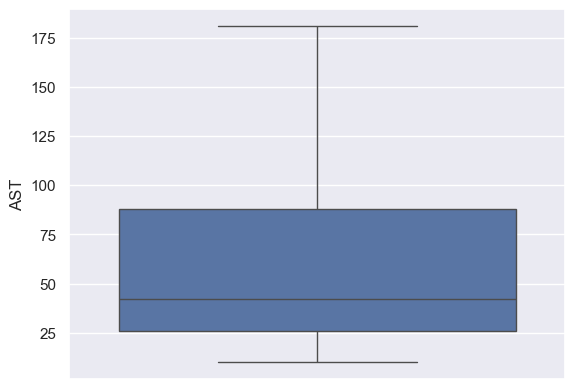

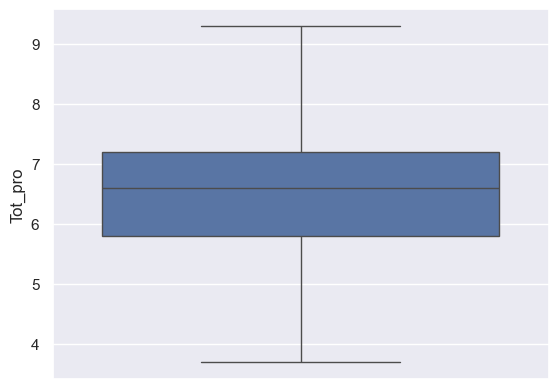

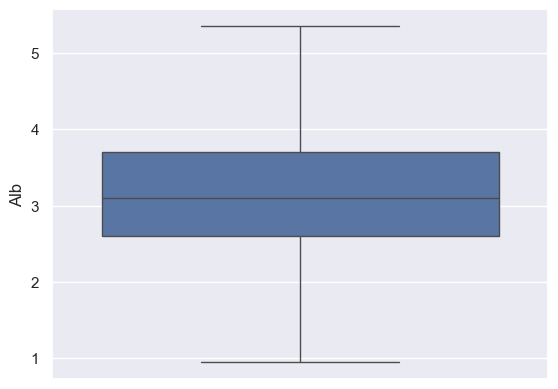

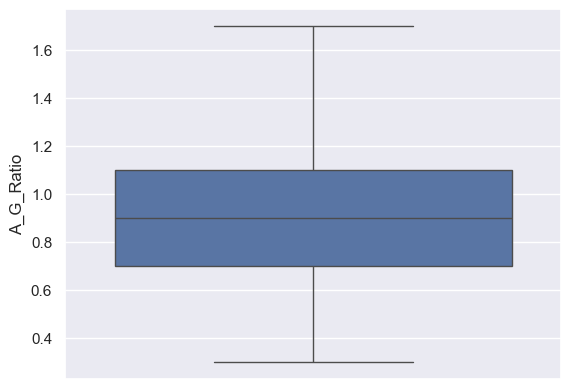

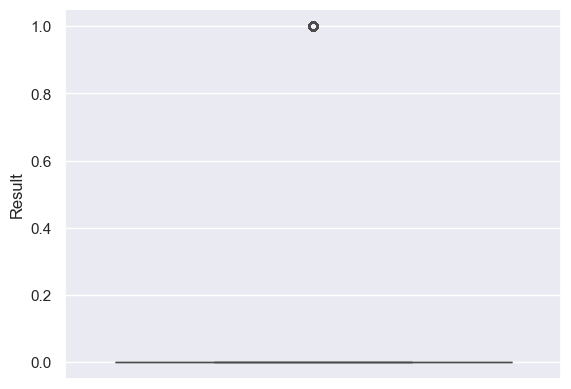

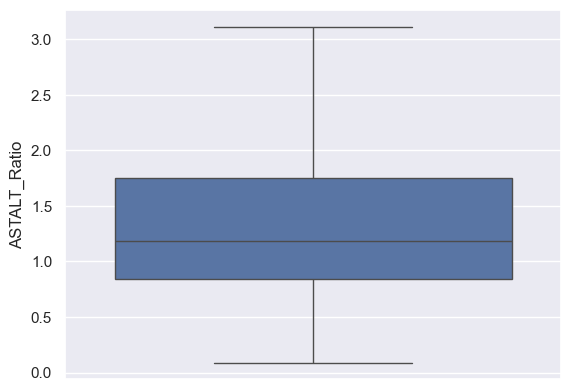

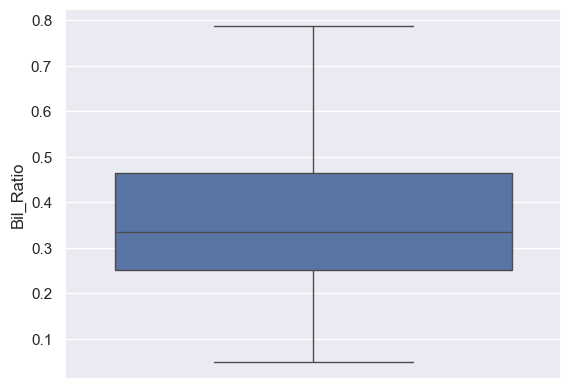

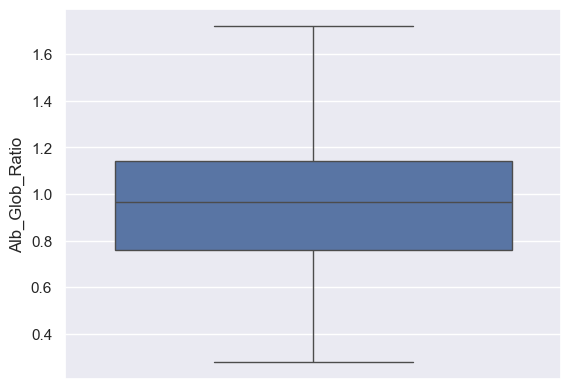

In [28]:
print("\Boxplots After Outlier Treatment:")
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

for i in list (df.select_dtypes(exclude=["object"]).columns)[1:]: 
    boxplots(i)

In [29]:
df= pd.get_dummies(df, columns=['Gender'], drop_first=True) # drop_first avoids multicollinearity
df

,Age,Tot_Bil,Dir_Bil,Alk_Phos,ALT,AST,Tot_pro,Alb,A_G_Ratio,Result,ASTALT_Ratio,Bil_Ratio,Alb_Glob_Ratio,Gender_Male
0,65.0,0.70,0.10,187.0,16.0,18.0,6.8,3.3,0.90,0,1.125000,0.142857,0.942857,False
1,62.0,5.55,2.95,482.5,64.0,100.0,7.5,3.2,0.74,0,1.562500,0.504587,0.744186,True
2,62.0,5.55,2.95,482.5,60.0,68.0,7.0,3.3,0.89,0,1.133333,0.561644,0.891892,True
3,58.0,1.00,0.40,182.0,14.0,20.0,6.8,3.4,1.00,0,1.428571,0.400000,1.000000,True
4,72.0,3.90,2.00,195.0,27.0,59.0,7.3,2.4,0.40,0,2.185185,0.512821,0.489796,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,2.20,1.00,482.5,17.0,28.0,7.3,2.6,0.55,0,1.647059,0.454545,0.553191,True
30687,55.0,2.90,1.30,482.0,22.0,34.0,7.0,2.4,0.50,0,1.545455,0.448276,0.521739,True
30688,54.0,5.55,2.95,482.5,116.0,66.0,6.4,3.1,0.90,0,0.568966,0.441176,0.939394,True
30689,48.0,1.90,1.00,231.0,16.0,55.0,4.3,1.6,0.60,0,3.115000,0.526316,0.592593,False


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27158 entries, 0 to 30690
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             27158 non-null  float64
 1   Tot_Bil         27158 non-null  float64
 2   Dir_Bil         27158 non-null  float64
 3   Alk_Phos        27158 non-null  float64
 4   ALT             27158 non-null  float64
 5   AST             27158 non-null  float64
 6   Tot_pro         27158 non-null  float64
 7   Alb             27158 non-null  float64
 8   A_G_Ratio       27158 non-null  float64
 9   Result          27158 non-null  int64  
 10  ASTALT_Ratio    27158 non-null  float64
 11  Bil_Ratio       27158 non-null  float64
 12  Alb_Glob_Ratio  27158 non-null  float64
 13  Gender_Male     27158 non-null  bool   
dtypes: bool(1), float64(12), int64(1)
memory usage: 2.9 MB


In [31]:
df.head(20)

,Age,Tot_Bil,Dir_Bil,Alk_Phos,ALT,AST,Tot_pro,Alb,A_G_Ratio,Result,ASTALT_Ratio,Bil_Ratio,Alb_Glob_Ratio,Gender_Male
0,65.0,0.70,0.10,187.0,16.0,18.0,6.8,3.3,0.90,0,1.125000,0.142857,0.942857,False
1,62.0,5.55,2.95,482.5,64.0,100.0,7.5,3.2,0.74,0,1.562500,0.504587,0.744186,True
2,62.0,5.55,2.95,482.5,60.0,68.0,7.0,3.3,0.89,0,1.133333,0.561644,0.891892,True
3,58.0,1.00,0.40,182.0,14.0,20.0,6.8,3.4,1.00,0,1.428571,0.400000,1.000000,True
4,72.0,3.90,2.00,195.0,27.0,59.0,7.3,2.4,0.40,0,2.185185,0.512821,0.489796,True
5,46.0,1.80,0.70,208.0,19.0,14.0,7.6,4.4,1.30,0,0.736842,0.388889,1.375000,True
7,29.0,0.90,0.30,202.0,14.0,11.0,6.7,3.6,1.10,0,0.785714,0.333333,1.161290,False
8,17.0,0.90,0.30,202.0,22.0,19.0,7.4,4.1,1.20,0,0.863636,0.333333,1.242424,True
9,55.0,0.70,0.20,290.0,53.0,58.0,6.8,3.4,1.00,0,1.094340,0.285714,1.000000,True
10,57.0,0.60,0.10,210.0,51.0,59.0,5.9,2.7,0.80,0,1.156863,0.166667,0.843750,True


In [32]:
X=df.drop(columns=["Result"])
y=df["Result"]

In [33]:
y.value_counts()

Result
0    24741
1     2417
Name: count, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   

In [36]:
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

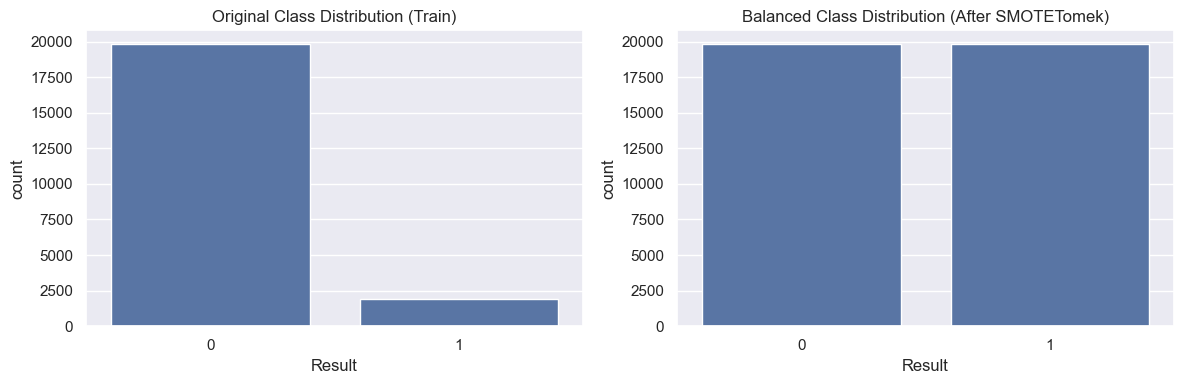

In [37]:
plt.figure(figsize=(12, 4))

# Before resampling
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Original Class Distribution (Train)")

# After resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution (After SMOTETomek)")

plt.tight_layout()
plt.show()

In [38]:
print("\nClass counts (Original Training Data):", Counter(y_train))
print("Class counts (Resampled Training Data):", Counter(y_resampled))
print("Class counts (Test Data - Unmodified):", Counter(y_test))


Class counts (Original Training Data): Counter({0: 19792, 1: 1934})
Class counts (Resampled Training Data): Counter({0: 19792, 1: 19792})
Class counts (Test Data - Unmodified): Counter({0: 4949, 1: 483})


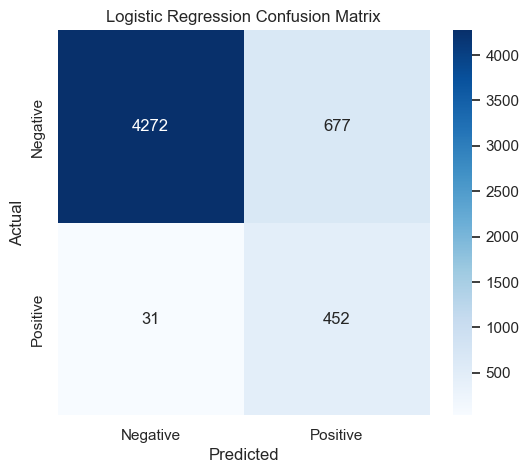

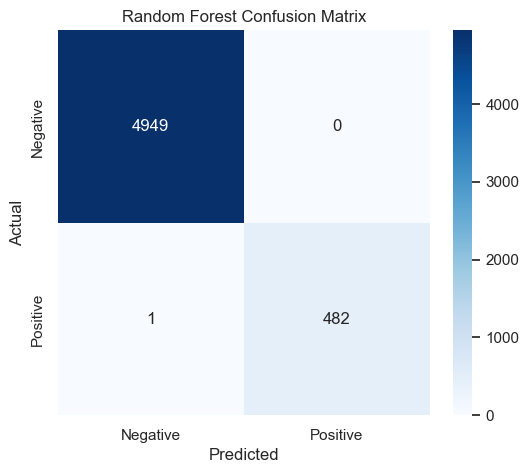

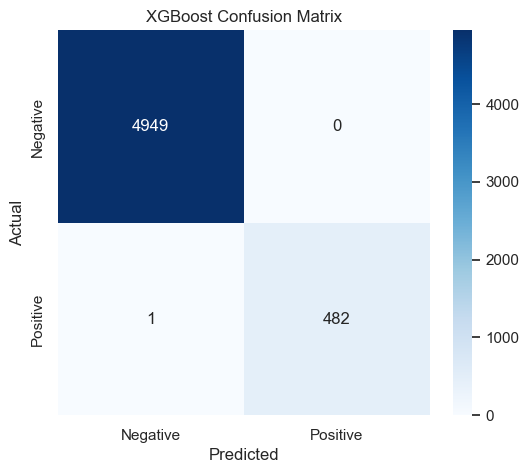

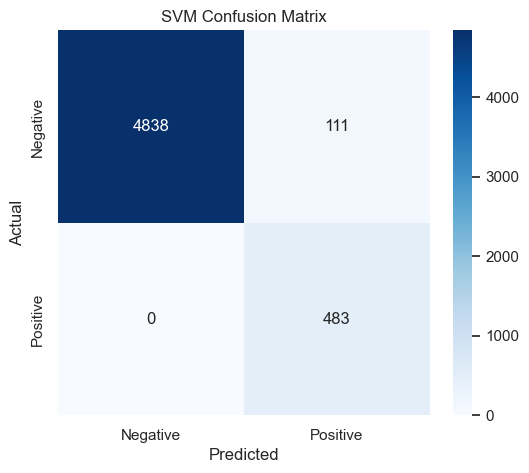

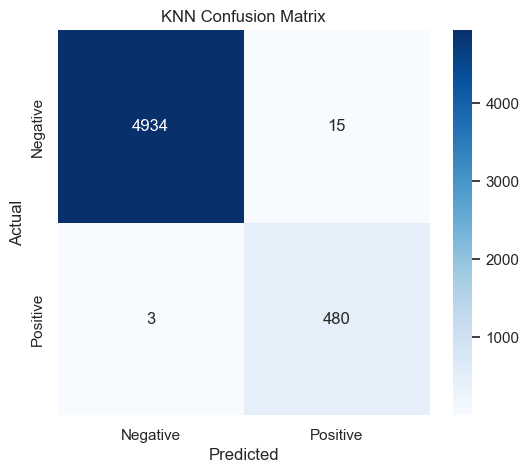


Model Performance:

Logistic Regression:
Accuracy: 0.8697
Precision: 0.4004
Recall: 0.9358
F1: 0.5608
ROC-AUC: 0.9524

Random Forest:
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9979
F1: 0.9990
ROC-AUC: 1.0000

XGBoost:
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9979
F1: 0.9990
ROC-AUC: 1.0000

SVM:
Accuracy: 0.9796
Precision: 0.8131
Recall: 1.0000
F1: 0.8969
ROC-AUC: 0.9948

KNN:
Accuracy: 0.9967
Precision: 0.9697
Recall: 0.9938
F1: 0.9816
ROC-AUC: 0.9976


In [39]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42),  # Enable probability for ROC-AUC
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    # Train on resampled data
    model.fit(X_resampled, y_resampled)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC
    
    # Calculate metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d',  cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Print results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

In [40]:
results_df = pd.DataFrame(results).T.sort_values(by="ROC-AUC", ascending=False)
print("\nModel Performance:")
print(results_df)


Model Performance:
                     Accuracy  Precision    Recall        F1   ROC-AUC
Random Forest        0.999816   1.000000  0.997930  0.998964  1.000000
XGBoost              0.999816   1.000000  0.997930  0.998964  1.000000
KNN                  0.996686   0.969697  0.993789  0.981595  0.997593
SVM                  0.979566   0.813131  1.000000  0.896936  0.994831
Logistic Regression  0.869661   0.400354  0.935818  0.560794  0.952394


In [41]:
import joblib
from sklearn.preprocessing import StandardScaler

# Save the trained Random Forest model
joblib.dump(models["Random Forest"], "fatty_liver_RF_model.joblib")

# Save the scaler (critical for preprocessing new data)
joblib.dump(scaler, "Fatty_liver_SCALER.joblib")

['Fatty_liver_SCALER.joblib']